##ECS 171 Group Project

### **1. Dataset**

* All features in this dataset are **categorical**, meaning they represent **qualitative labels**, not numerical quantities. Therefore, **standardization is not appropriate**. For instance, the `HighBP` feature uses `0` to indicate no high blood pressure and `1` to indicate presence of high blood pressure. Standardizing this would incorrectly imply that `1 > 0` in a numerical sense, which distorts the categorical nature of the data.

* To handle categorical features correctly, I applied **one-hot encoding**, which converts values like `0` and `1` into distinct vectors such as `[1, 0]` and `[0, 1]`.

* In addition, I **bucketed the continuous features** `BMI`, `MentHlth`, and `PhysHlth` into discrete classes based on meaningful thresholds. For example, `BMI` is categorized into **five classes** (0 through 4). More details on the binning criteria can be found in the final text cell of the notebook or in the provided dataset:
  📎 [Google Drive CSV link](https://drive.google.com/file/d/1oAdz8yzwIxZaj8vnneNy6L6QCKL9gQ3_/view?usp=sharing)

* Since artificial neural networks (ANNs) are capable of capturing both **linear and non-linear relationships**, we fed the entire encoded dataset into the model without additional feature engineering.

---

### **2. Artificial Neural Network (ANN) Design**

* The model consists of **11 total layers**: 1 input layer, 9 hidden layers, and 1 output layer.
* Each hidden layer contains **30 neurons** and uses the **ReLU activation function**.
* The output layer uses a **sigmoid activation function**, suitable for binary classification.
* **L1 and L2 regularization** (each set to `0.001`) was applied across all layers to reduce overfitting.
* The **SGD optimizer** was used with a **momentum of 0.9** to accelerate convergence.

---

### **3. Model Performance and Findings**

* The ANN achieved **high accuracy on the test set**, indicating good generalization.
* The **confusion matrix** and derived metrics (precision, recall, F1-score) also showed strong performance, confirming that the model effectively captured the relationship between the features and the target variable.


**Conclusion**: The ANN model performed well with the fully one-hot encoded dataset, validating that proper encoding and a well-structured neural network can effectively model complex relationships in categorical health-related data.



Epoch 1/100


/Users/laurelmurphy/projects/diabetes-risk-predictor/diabetes-venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.7724 - loss: 1.7887 - val_accuracy: 0.9099 - val_loss: 0.8633
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.9053 - loss: 0.7427 - val_accuracy: 0.9134 - val_loss: 0.3952
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.9098 - loss: 0.3638 - val_accuracy: 0.9187 - val_loss: 0.2689
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.9072 - loss: 0.2714 - val_accuracy: 0.9011 - val_loss: 0.2548
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9075 - loss: 0.2542 - val_accuracy: 0.9205 - val_loss: 0.2285
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.9082 - loss: 0.2401 - val_accuracy: 0.9240 - val_loss: 0.2214
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.9096 - loss: 0.2339 - val_accuracy: 0.9187 - val_loss: 0.2177
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.9078 - loss: 0.2318 - val_

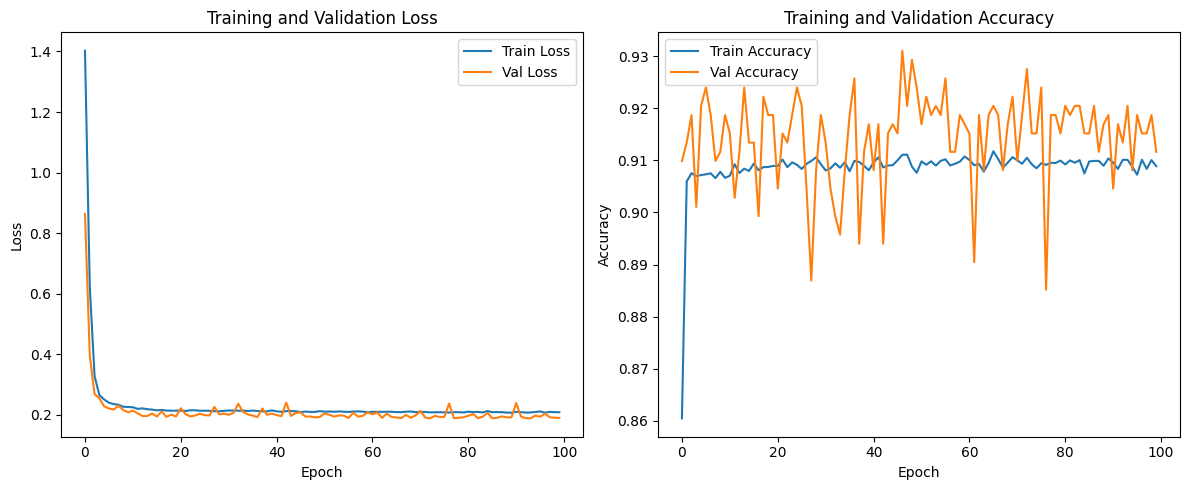

442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.9061 - loss: 0.2115

Test Accuracy: 0.9089
Test Loss: 0.2089
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step

Confusion Matrix:
[[6427  663]
 [ 625 6424]]

True Negatives (TN): 6427
False Positives (FP): 663
False Negatives (FN): 625
True Positives (TP): 6424

--- Metrics Report for ANN Model ---
Precision : 0.9064
Recall       : 0.9113
F1 Score   : 0.9089


In [1]:
!pip install tensorflow
# --- IMPORTS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# --- LOAD DATA ---
url = 'https://drive.google.com/uc?id=1d21XE-eTEJHvyneON2MVs0LuUM3loZgg'
df = pd.read_csv(url)

# --- EXTRACT TARGET ---
y = df.iloc[:, 0].values.astype(np.float32)

X_raw = df.iloc[:, 1:]  # all features
X_encoded = pd.get_dummies(X_raw.astype(str), prefix=X_raw.columns.astype(str))

X = X_encoded.values

# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- DEFINE ANN MODEL ---
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))
for _ in range(9):
    model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(1, activation='sigmoid'))  # Binary output

# --- COMPILE MODEL ---
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# --- TRAIN MODEL ---
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.01)

# --- VISUALIZE TRAINING HISTORY ---
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print("\n--- Final Epoch Training Stats ---")
print(f"Train Accuracy: {train_acc[-1]:.4f}")
print(f"Train Loss    : {train_loss[-1]:.4f}")
print(f"Val Accuracy  : {val_acc[-1]:.4f}")
print(f"Val Loss      : {val_loss[-1]:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# --- EVALUATE MODEL ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# --- PREDICT AND REPORT METRICS ---
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob >= 0.5).astype(int)
y_true = y_test.astype(int)

cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nTrue Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")

precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print("\n--- Metrics Report for ANN Model ---")
print(f"{'Precision':10s}: {precision:.4f}")
print(f"{'Recall':10s}   : {recall:.4f}")
print(f"{'F1 Score':10s} : {f1:.4f}")
